<a href="https://colab.research.google.com/github/rezjaq/MachLearn/blob/main/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Praktikum 1**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

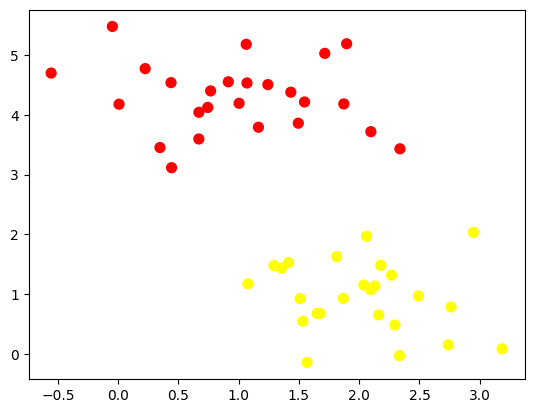

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

make_blobs:

Fungsi ini digunakan untuk membuat data sintetis berupa titik-titik (samples) yang terkelompok dalam kluster.
Parameter:
n_samples=50: Membuat 50 sampel data.
centers=2: Data akan dibagi menjadi dua kluster (pusat kluster).
random_state=0: Mengatur seed random agar hasilnya konsisten (reproduksibel).
cluster_std=0.60: Menentukan standar deviasi untuk penyebaran titik-titik dari pusat kluster. Semakin kecil nilainya, semakin rapat klusternya.
Scatter Plot:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan scatter plot dengan komponen berikut:
X[:, 0] dan X[:, 1]: Merupakan koordinat x dan y dari data yang dihasilkan oleh make_blobs.
c=y: Warna setiap titik berdasarkan label kluster (y).
s=50: Ukuran titik-titik scatter.
cmap='autumn': Menggunakan colormap 'autumn' untuk memberi warna sesuai klusternya.

(-1.0, 3.5)

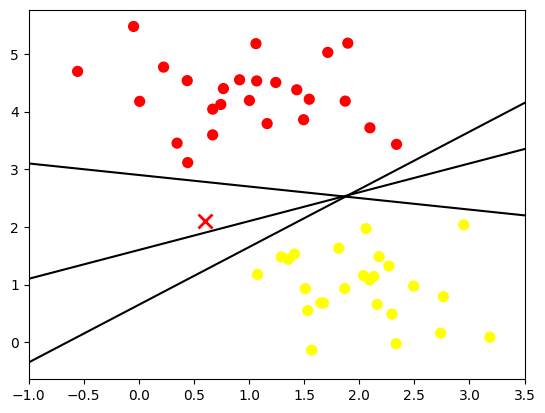

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

xfit = np.linspace(-1, 3.5):

Membuat array xfit yang berisi nilai-nilai yang dibangkitkan secara linier dari -1 hingga 3.5. Array ini digunakan sebagai sumbu-x untuk menggambar garis lurus pada plot.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):

Bagian ini sama seperti sebelumnya, menampilkan scatter plot dari data yang dihasilkan oleh make_blobs, dengan warna yang berbeda sesuai label kluster.
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10):

Menambahkan satu titik khusus pada posisi (0.6, 2.1) dengan simbol 'x' berwarna merah, berukuran besar (10) dan lebar tepi markernya diatur menjadi 2.
Ini bisa menandakan misalnya sebuah pusat, target, atau titik khusus dalam analisis.

Di sini, ada tiga garis yang ditambahkan ke plot. Setiap garis mengikuti bentuk persamaan linear: y = m * x + b, di mana:
m: Gradien atau kemiringan garis.
b: Intersep, titik di mana garis memotong sumbu-y.
Warna '-k' berarti garis-garis tersebut berwarna hitam.
Dengan setiap nilai pasangan (m, b), kode ini menggambar tiga garis dengan kemiringan dan intersep berbeda. Ini memberikan ilustrasi dari beberapa garis pemisah yang mungkin.
plt.xlim(-1, 3.5):

Mengatur batas sumbu-x pada plot dari -1 hingga 3.5, memastikan keseluruhan dataset dan garis-garis berada dalam batas ini.

(-1.0, 3.5)

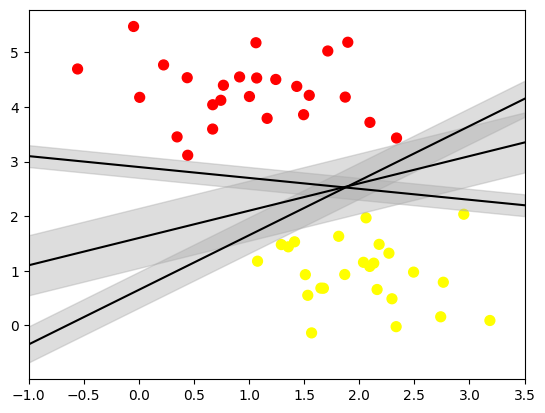

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

xfit = np.linspace(-1, 3.5):

Array xfit dibuat dengan nilai-nilai yang tersebar secara linier dari -1 hingga 3.5. Ini digunakan untuk mendefinisikan rentang sumbu-x untuk menggambar garis-garis lurus.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):

Scatter plot dibuat untuk menampilkan data dengan warna berdasarkan label kluster y.

Pada loop ini, tiga garis lurus dan area di sekitarnya digambar. Setiap garis mengikuti persamaan linear: yfit = m * xfit + b, di mana:

m: Gradien atau kemiringan garis.
b: Intersep atau titik di mana garis memotong sumbu-y.
d: Lebar margin di sekitar garis, yang digunakan untuk menentukan jarak vertikal atas dan bawah dari garis pusat (yfit).

Setelah garis digambar (plt.plot(xfit, yfit, '-k')), area di sekitarnya diisi dengan warna abu-abu terang (color='#AAAAAA') dengan transparansi (alpha=0.4) menggunakan fungsi plt.fill_between.

plt.fill_between(xfit, yfit - d, yfit + d, ...) mengisi area antara yfit - d (batas bawah) dan yfit + d (batas atas).
Ini menunjukkan margin atau ketidakpastian di sekitar garis tersebut.
plt.xlim(-1, 3.5):

Mengatur batas sumbu-x pada plot dari -1 hingga 3.5, memastikan seluruh visualisasi berada dalam jangkauan yang diinginkan.

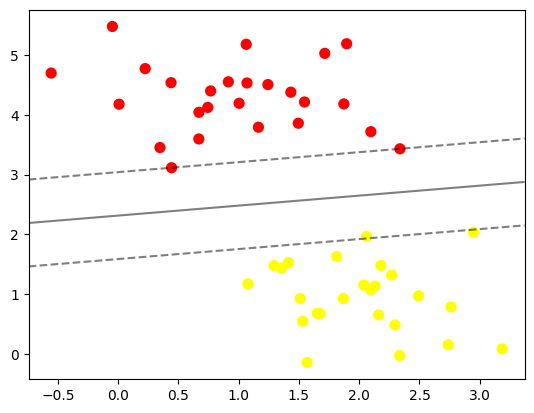

In [5]:
from sklearn.svm import SVC
# Buat dataset dengan make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.60, random_state=0)

model = SVC(kernel='linear')
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

Di sini menggunakan Support Vector Classifier (SVC) dengan kernel linear dan melatih model menggunakan dataset X dan label y.

Fungsi plot_svc_decision_function: Fungsi ini membuat decision boundary (garis batas keputusan) dari model SVM dan menampilkan support vectors yang ditemukan oleh model. Garis batas ini memisahkan dua kelas dalam data.

Visualisasi: Scatter plot ditampilkan dengan data, dan garis batas keputusan dari model SVM digambar di atasnya, bersama dengan margin dan support vectors.

In [6]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

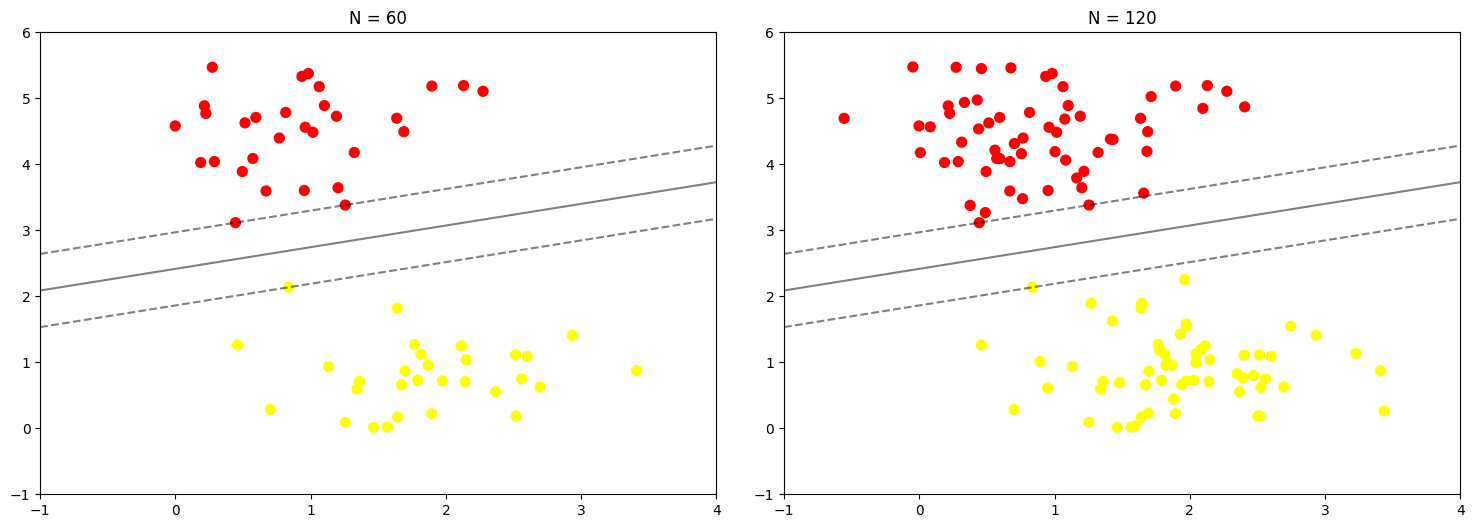

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Kode ini bertujuan untuk membuat dua visualisasi model Support Vector Machine (SVM) dengan jumlah sampel data yang berbeda, yaitu 60 dan 120, dan menampilkan decision boundary serta support vectors.

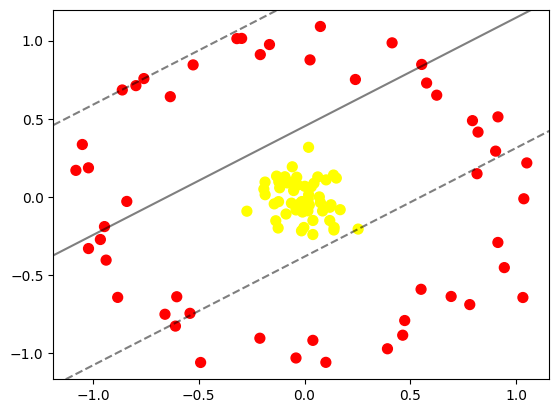

In [8]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Dataset berbentuk lingkaran (non-linear), dan model SVM dengan kernel linier tidak bisa memisahkan data dengan baik. Karena data tidak dapat dipisahkan secara linier, decision boundary yang dihasilkan tidak akan memisahkan kedua kelas secara akurat. Garis pemisah yang dihasilkan akan berupa garis lurus, meskipun pola data sebenarnya memerlukan pemisahan non-linier (misalnya dengan kernel yang lebih kompleks seperti RBF).

In [9]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.92284439e-01,  4.91063418e-02],
       [-9.38131045e-01, -4.06013316e-01],
       [ 1.00907600e-01, -1.06099419e+00],
       [-6.04097336e-01, -6.40698688e-01],
       [-3.12798527e-03, -1.96909495e-01],
       [-1.02140475e+00, -3.31862311e-01],
       [ 2.40605096e-01,  7.51318416e-01],
       [-1.42998701e-02, -2.18381117e-01],
       [ 1.21995440e-03,  6.70315517e-02],
       [ 1.91333846e-02,  3.16813935e-01],
       [-2.09115179e-01,  9.10764091e-01],
       [ 4.64275205e-01, -8.87044556e-01],
       [-9.40992610e-03, -9.80226067e-02],
       [-7.59505973e-01,  7.57251472e-01],
       [ 1.60261518e-02, -9.02323269e-02],
       [-5.26735096e-01,  8.44893624e-01],
       [ 7.49969107e-02,  1.09097291e+00],
       [-5.15022548e-02,  3.98203007e-02],
       [ 1.68615703e-01, -8.28495296e-02],
       [-5.79206457e-02,  1.91972562e-01],
       [ 4.46882948e-02,  8.65907211e-02],
       [ 4.14095157e-01,  9.86128213e-01],
       [-4.02891923e-02, -8.45932613e-02],
       [-7.09300309e-02,  9.41395292e-02],
       [ 9.44674360e-01, -4.53966870e-01],
       [-6.59777871e-01, -7.52894200e-01],
       [-1.05059633e+00,  3.34817792e-01],
       [-1.23315447e-02, -3.06195864e-02],
       [-6.10384261e-01, -8.28735694e-01],
       [-1.81997027e-02, -3.85867601e-02],
       [ 7.81347242e-01, -6.90914476e-01],
       [ 9.14310657e-01, -2.92821600e-01],
       [ 2.27104266e-02, -5.27285761e-02],
       [-1.32165770e-01,  1.32339675e-01],
       [-6.18705328e-02, -4.09114487e-02],
       [-1.86666382e-01,  9.40866432e-02],
       [ 1.50358244e-01,  1.19713752e-01],
       [ 3.94575532e-02, -2.41996281e-01],
       [-4.03113362e-02, -1.03307109e+00],
       [ 5.54090401e-01,  8.47709457e-01],
       [-9.65247348e-01, -2.73922176e-01],
       [ 8.15668414e-01,  1.47621612e-01],
       [ 6.93263594e-01, -6.38894943e-01],
       [ 1.03692417e+00, -1.29192475e-02],
       [-1.22788233e-01, -3.12540406e-02],
       [-3.68427850e-02,  1.25170992e-01],
       [ 8.20425328e-01,  4.14385523e-01],
       [-2.11098242e-01, -9.06426406e-01],
       [ 3.97136789e-02, -1.51966120e-01],
       [-2.97325341e-01,  1.01453755e+00],
       [ 1.19343047e-01, -1.52377837e-01],
       [-8.40332655e-01, -3.00036602e-02],
       [-5.41461821e-01, -7.46839054e-01],
       [ 7.94161047e-01,  4.87674316e-01],
       [ 5.77287973e-01,  7.28679228e-01],
       [-1.65668952e-01,  9.75212433e-01],
       [ 5.51042228e-01, -5.92936204e-01],
       [ 1.05103789e+00,  2.16779980e-01],
       [ 6.25092934e-01,  6.50752157e-01],
       [-2.72523813e-01, -9.25085030e-02],
       [ 6.99805553e-02, -1.05584500e-03],
       [ 1.19877679e-01, -6.72671057e-02],
       [-3.22186591e-02,  7.48049084e-02],
       [-9.45860372e-01, -1.91124763e-01],
       [ 1.76131681e-02, -1.36202203e-02],
       [ 8.53553153e-02, -9.09389380e-02],
       [-8.73966083e-02, -1.10643612e-01],
       [-8.61719947e-01,  6.84200716e-01],
       [-1.21601318e-01,  9.59167775e-02],
       [ 4.73793432e-01, -7.93074064e-01],
       [-1.02158043e+00,  1.85404770e-01],
       [-4.91256379e-01, -1.06181946e+00],
       [ 1.03254429e+00, -6.45519206e-01],
       [ 9.14602569e-01,  5.11797936e-01],
       [ 1.40112223e-01, -1.97011780e-01],
       [-1.86145957e-01,  1.31192901e-02],
       [-1.08101738e+00,  1.69091913e-01],
       [-6.34640967e-01,  6.41174822e-01],
       [ 3.22119795e-02,  6.42983214e-02],
       [ 3.94935329e-02, -9.20086094e-01],
       [-9.28821064e-02,  1.28004121e-01],
       [ 1.37099656e-01,  1.39110089e-01],
       [-1.43309855e-01, -4.57706942e-02],
       [ 1.02049168e-01,  1.08114342e-01],
       [ 2.53545042e-01, -2.07146976e-01],
       [ 6.26869501e-02,  1.27118694e-01],
       [ 7.52632121e-02, -3.75177123e-02],
       [-8.04223073e-02,  8.86618055e-02],
       [-1.17398618e-01,  5.74747070e-02],
       [-1.24695811e-01, -2.00218991e-01],
       [ 1.38842311e-01, -2.13023921e-01],
       [-3.19775357e-01,  1.01315521e+00

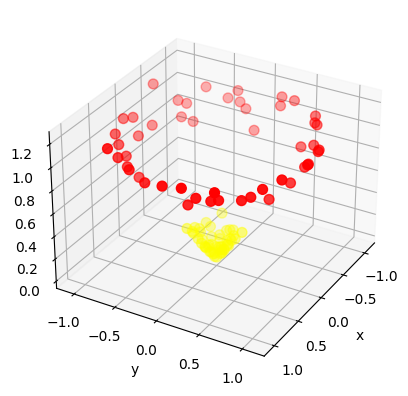

In [10]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

interact: Fungsi interact digunakan untuk membuat antarmuka interaktif yang memungkinkan kamu memanipulasi parameter visualisasi secara real-time. Misalnya, kamu bisa mengubah sudut pandang 3D (elev dan azim) menggunakan slider atau pilihan nilai.

r = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2): Ini adalah nilai untuk sumbu z (variabel r), yang dihitung sebagai jarak dari titik asal (0, 0) di bidang xy. Ini memberikan dimensi tambahan ke plot 3D.

ax.view_init(elev=elev, azim=azim): Mengatur sudut pandang 3D dengan parameter elevasi (elev) dan azimuthal (azim), yang dapat diubah secara interaktif menggunakan interact.

In [11]:
# Buat dataset dan variabel tambahan 'r' untuk sumbu z
X, y = make_circles(100, factor=.1, noise=.1)
r = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)

# Fungsi untuk menampilkan plot 3D
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

# Interaktif widget untuk plot
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-7.71368477e-01,  7.34210109e-01],
       [-2.88973213e-01,  1.08171706e+00],
       [ 1.47444994e-01, -1.14708369e-01],
       [ 7.00336265e-02,  5.38468468e-02],
       [-7.81820470e-01, -3.32556094e-01],
       [-7.95754231e-02,  4.38013363e-02],
       [-6.57509319e-01,  6.01032305e-01],
       [ 2.99260304e-03, -2.74937232e-01],
       [ 2.25647154e-02,  8.90998927e-01],
       [-9.92599167e-02, -6.71697126e-01],
       [-1.14253076e+00,  1.91598028e-01],
       [ 1.20486117e-01,  9.34441693e-02],
       [-3.36866700e-01,  9.43002316e-01],
       [-3.05182377e-01,  1.75951216e-02],
       [ 1.46549472e-01,  1.47753132e-01],
       [ 3.43213287e-01, -1.08375484e+00],
       [-9.31802688e-01,  4.12277050e-01],
       [-4.02886500e-01, -9.17195960e-01],
       [-7.18848291e-01,  3.81450259e-01],
       [-5.49857223e-02, -2.20423073e-01],
       [ 1.57087787e-01, -1.57161990e-02],
       [ 2.71772582e-01,  3.41501920e-02],
       [ 7.96142450e-01,  6.31103275e-01],
       [ 8.51920444e-01, -3.66106550e-01],
       [ 9.91355646e-02,  1.15521385e+00],
       [ 7.50430514e-01, -6.78997019e-01],
       [ 5.28774396e-02,  2.43578280e-01],
       [-9.63062814e-02, -2.53619323e-01],
       [ 1.68739267e-01, -4.22245466e-02],
       [-1.12254702e-01, -5.30196131e-02],
       [ 1.47397281e-02,  6.23526900e-02],
       [ 5.50871219e-03,  9.97050599e-02],
       [ 2.04494795e-01,  1.40313792e-01],
       [-3.16952518e-01,  1.11549862e-01],
       [-8.21431272e-02, -1.40097678e-01],
       [ 7.12782971e-01, -6.43590608e-01],
       [-6.94574191e-02, -1.27403039e-02],
       [ 8.87101016e-01,  3.85370180e-01],
       [ 4.91903397e-01, -8.84840941e-01],
       [ 1.57392672e-01,  5.37198501e-02],
       [ 7.33953958e-02,  9.32636836e-01],
       [-1.14719551e-01,  2.26707405e-01],
       [-5.83109427e-02, -9.28721864e-01],
       [-1.19433496e-01, -9.99388047e-02],
       [ 1.02997764e-01, -1.17505042e-02],
       [ 9.40864878e-03,  8.69299336e-02],
       [ 5.76208431e-01,  7.47035815e-01],
       [ 1.47816806e-01, -1.48425567e-01],
       [ 3.28951636e-02,  2.81287408e-01],
       [ 8.93221697e-02,  1.51231759e-01],
       [ 9.30539274e-02, -1.26779139e-01],
       [-3.65323843e-01, -1.13272142e+00],
       [ 2.01333395e-02,  1.67822953e-01],
       [-5.08115219e-01,  8.27033433e-01],
       [ 9.29987385e-01,  1.06576711e-02],
       [-5.14518936e-01,  1.00311874e+00],
       [ 8.83012059e-01,  3.46731583e-01],
       [-6.94180481e-01, -9.25696961e-01],
       [-1.32837048e-01, -1.50403178e-02],
       [ 4.60915840e-01,  9.82058104e-01],
       [ 5.90078417e-02, -1.33108517e-01],
       [-6.12756254e-02, -2.42240602e-02],
       [-9.81919325e-02,  2.30759746e-03],
       [ 6.06337807e-02, -5.47139291e-02],
       [ 4.03572119e-01,  7.17555927e-01],
       [ 4.82113993e-02,  3.53396706e-02],
       [ 1.00068004e+00, -1.22710822e-01],
       [ 1.13830442e-01,  4.77757479e-02],
       [-2.29525888e-02,  1.07358347e-01],
       [-1.05024780e+00, -7.88481407e-02],
       [-1.66439152e-01,  6.34440222e-02],
       [-1.78616509e-01, -2.04363114e-01],
       [-8.86999508e-01,  1.49667674e-01],
       [-4.54625918e-01, -1.05730430e+00],
       [ 5.13860396e-01, -6.03074620e-01],
       [ 8.26251733e-01,  6.99667520e-01],
       [ 8.35411234e-01, -1.89382180e-01],
       [-8.45340650e-01, -5.33319518e-01],
       [-4.15103070e-02,  1.15400988e-01],
       [-1.12116237e+00,  4.14911475e-01],
       [-7.83548457e-01,  4.51188370e-01],
       [ 6.59663502e-01, -3.66990451e-01],
       [ 1.44422378e-01,  6.18418519e-02],
       [-9.68120903e-01, -5.16993313e-01],
       [ 1.29566281e-01,  3.23926539e-02],
       [ 5.30803352e-01, -8.27801599e-01],
       [ 1.76047806e-01, -1.15257502e+00],
       [-1.34436648e-01, -8.26111498e-02],
       [ 4.58500362e-01,  8.64741831e-01],
       [ 6.76029213e-02,  1.28544800e-01],
       [-5.09303243e-02,  2.63256073e-02],
       [ 4.65028625e-02,  2.86334988e-02

interact:
interact akan membuat widget interaktif yang memungkinkan kamu mengubah parameter elev (elevasi) dan azim (azimuthal angle) secara dinamis. Kamu bisa memilih dari daftar opsi elev dan menggeser nilai azim antara -180 dan 180 derajat.
Dropdown dan IntSlider:
Jika kamu ingin secara eksplisit menggunakan widget seperti Dropdown dan IntSlider, kamu bisa menambahkan mereka ke interactive. Namun, ini tidak diperlukan karena interact secara otomatis menghasilkan widget yang sesuai berdasarkan tipe data dari parameter.

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

SVC(kernel='rbf', C=1E6):

SVC: Ini adalah kelas dari scikit-learn untuk Support Vector Classification.
kernel='rbf': Menentukan bahwa kernel yang digunakan adalah Radial Basis Function (RBF), yang baik untuk menangani data yang tidak dapat dipisahkan secara linier.
C=1E6: Parameter regularisasi C, yang mengontrol trade-off antara mencocokkan data training dengan margin yang lebih luas. Nilai besar (seperti 1E6) berarti model akan mencoba untuk mencocokkan data training dengan lebih baik (sedikit overfitting jika data sangat kompleks).
clf.fit(X, y):

fit(X, y): Melatih model SVC menggunakan data fitur X dan label y. Model ini akan mencari hyperplane terbaik yang memisahkan dua kelas dalam data.

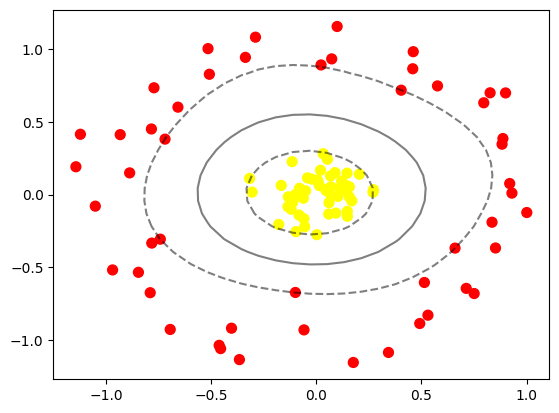

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan plot sebar data X dengan warna sesuai label y.

plot_svc_decision_function(clf): Menampilkan batas keputusan dan margin dari model SVM yang telah dilatih.

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none'): Menambahkan plot sebar untuk support vectors model dengan ukuran besar dan tanpa warna latar belakang.

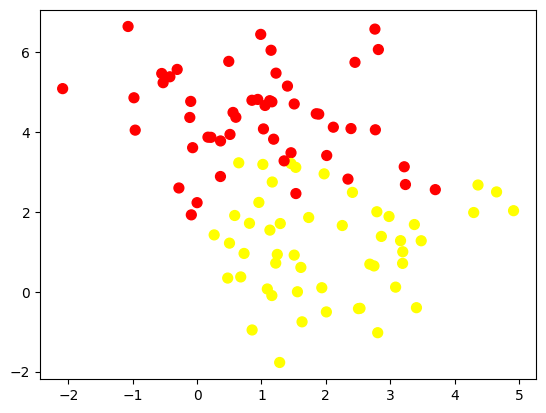

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Kode ini menghasilkan dan menampilkan plot sebar dari 100 titik data yang dibagi menjadi dua kelompok menggunakan make_blobs. Titik data tersebut memiliki dua fitur dan dikategorikan berdasarkan label y. Visualisasi ini menunjukkan distribusi data dengan dua warna berbeda untuk masing-masing kelas.

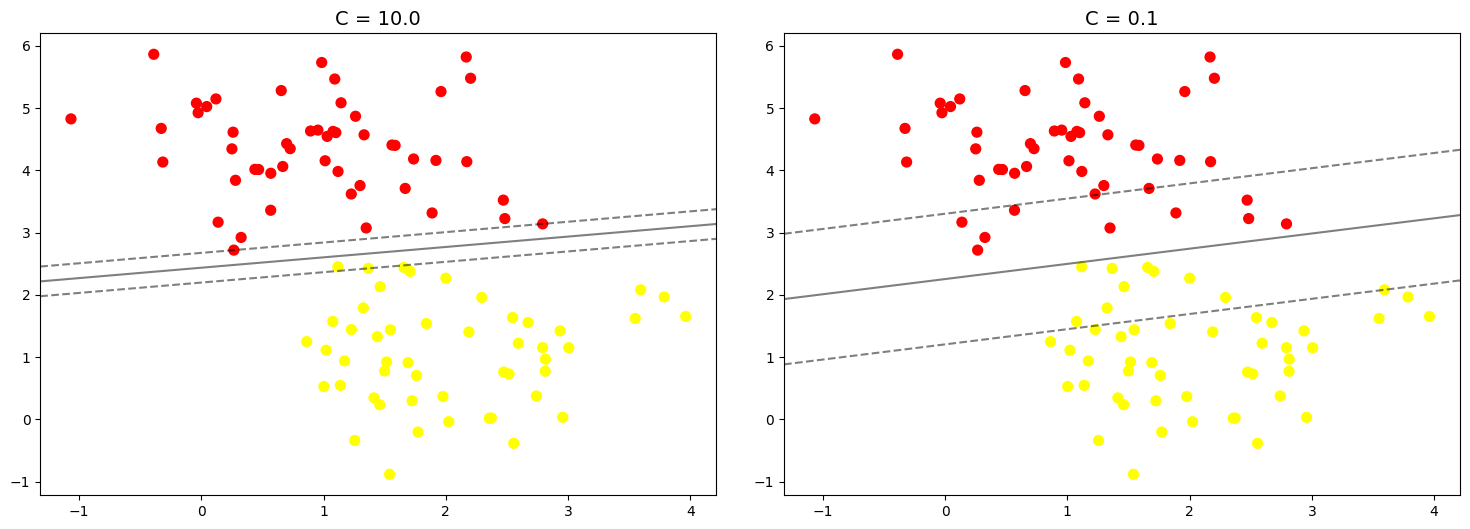

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Kode ini menghasilkan dua plot yang membandingkan efek parameter regularisasi C pada model SVM dengan kernel linear:

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8): Membuat dataset dengan 100 sampel yang dibagi menjadi dua kelompok dengan penyebaran standar deviasi 0.8.

fig, ax = plt.subplots(1, 2, figsize=(16, 6)): Membuat figure dengan dua subplot berdampingan.

Loop for axi, C in zip(ax, [10.0, 0.1]):

model = SVC(kernel='linear', C=C).fit(X, y): Melatih model SVM dengan kernel linear menggunakan dua nilai C (10.0 dan 0.1).
axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan data titik dengan warna sesuai label.
plot_svc_decision_function(model, axi): Menambahkan batas keputusan dan margin ke plot.
axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none'): Menandai support vectors pada plot.
axi.set_title('C = {0:.1f}'.format(C), size=14): Menambahkan judul pada subplot untuk menunjukkan nilai C.

### **Praktikum 2**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data = pd.read_csv('/content/drive/MyDrive/ML/lfw_readme.csv')

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


faces = fetch_lfw_people(min_faces_per_person=60):

Memuat dataset LFW dengan syarat bahwa hanya orang-orang yang memiliki setidaknya 60 gambar wajah yang akan dimuat. Ini membantu untuk memastikan dataset yang lebih konsisten dan berkualitas tinggi.
print(faces.target_names):

Menampilkan nama-nama orang (target names) yang terdapat dalam dataset. Ini adalah array berisi nama-nama orang yang memiliki wajah dalam dataset.
print(len(faces.target_names)):

Menampilkan jumlah nama yang berbeda (jumlah orang) dalam dataset. Ini menunjukkan berapa banyak individu yang ada dalam dataset.
print(faces.images.shape):

Menampilkan bentuk (shape) dari array gambar. Ini memberikan informasi tentang jumlah gambar dan dimensi masing-masing gambar. Biasanya, bentuk ini adalah (n_samples, height, width), di mana n_samples adalah jumlah total gambar, dan height serta width adalah dimensi dari gambar.

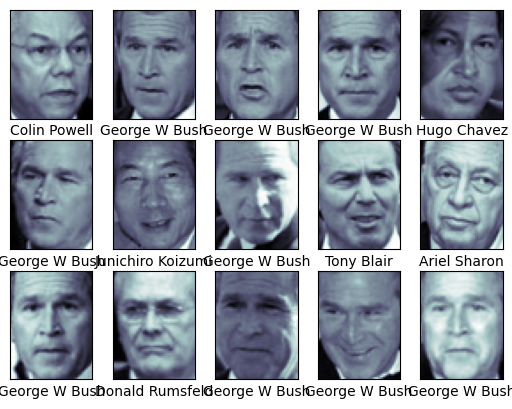

In [19]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

fig, ax = plt.subplots(3, 5):

Membuat figure (fig) dan grid subplot dengan 3 baris dan 5 kolom (ax). Ini berarti ada total 15 subplot.
for i, axi in enumerate(ax.flat)::

Iterasi melalui semua subplot (ax.flat memberikan iterator untuk semua subplot dalam grid). i adalah indeks subplot, dan axi adalah objek subplot saat ini.
axi.imshow(faces.images[i], cmap='bone'):

Menampilkan gambar wajah ke subplot axi dengan menggunakan colormap 'bone'. faces.images[i] adalah gambar wajah pada indeks i dari dataset.
axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]]):

Menghapus tanda-tanda sumbu x dan y (xticks dan yticks) untuk setiap subplot agar hanya gambar yang ditampilkan tanpa sumbu.
Menambahkan label pada sumbu x dengan nama orang yang sesuai dengan gambar menggunakan faces.target_names[faces.target[i]].

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [21]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import train_test_split:

Mengimpor fungsi train_test_split dari sklearn.model_selection, yang digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian.
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42):

train_test_split membagi data dan target menjadi set pelatihan dan pengujian.
faces.data adalah data gambar wajah (fitur) dan faces.target adalah label target (nama orang).
Xtrain dan ytrain adalah data dan label untuk pelatihan.
Xtest dan ytest adalah data dan label untuk pengujian.
random_state=42 memastikan pembagian dataset yang konsisten setiap kali kode dijalankan dengan menggunakan nilai acak yang sama (42 adalah nilai contoh, dan dapat diganti sesuai kebutuhan).

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 1min 33s, sys: 25.6 s, total: 1min 58s
Wall time: 1min 15s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


from sklearn.model_selection import GridSearchCV:

Mengimpor GridSearchCV dari sklearn.model_selection, yang digunakan untuk pencarian hyperparameter dengan metode pencarian grid.
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}:

Mendefinisikan grid parameter yang ingin dicoba. param_grid adalah dictionary di mana kunci adalah nama parameter model dengan prefix svc__ (menunjukkan bahwa parameter ini untuk estimator SVC dalam pipeline), dan nilai adalah daftar nilai yang ingin diuji.
C adalah parameter regularisasi untuk SVC, dan gamma adalah parameter kernel.
grid = GridSearchCV(model, param_grid):

Membuat objek GridSearchCV dengan model (SVC model atau pipeline) dan param_grid untuk pencarian parameter. Objek ini akan mencoba semua kombinasi parameter yang didefinisikan.
%time grid.fit(Xtrain, ytrain):

Menjalankan pencarian grid pada data pelatihan (Xtrain dan ytrain) dan mengukur waktu yang dibutuhkan untuk menjalankan pencarian. %time adalah magic command di Jupyter Notebook yang mengukur waktu eksekusi.
print(grid.best_params_):

Mencetak parameter terbaik yang ditemukan selama pencarian grid.
print(grid.best_score_):

Mencetak skor terbaik yang dicapai dengan parameter terbaik yang ditemukan.

In [23]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

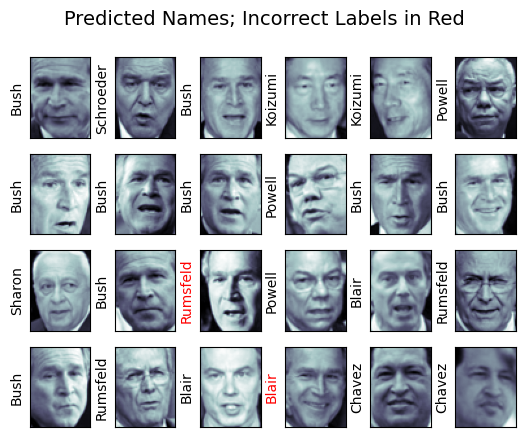

In [24]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

fig, ax = plt.subplots(4, 6):

Membuat sebuah figure dan array subplot dengan 4 baris dan 6 kolom. Ini berarti akan ada total 24 subplot dalam grid.
for i, axi in enumerate(ax.flat)::

Iterasi melalui setiap subplot (axi) dalam grid. ax.flat merata-ratakan array subplot menjadi satu dimensi untuk iterasi yang lebih mudah.
axi.imshow(Xtest[i].reshape(62, 47), cmap='bone'):

Menampilkan gambar wajah dari data testing (Xtest[i]) pada subplot axi. reshape(62, 47) mengubah array datanya menjadi dimensi gambar yang sesuai. cmap='bone' digunakan untuk colormap, memberikan tampilan grayscale.
axi.set(xticks=[], yticks=[]):

Menghilangkan ticks pada sumbu x dan y untuk setiap subplot, membuat visualisasi lebih bersih.
axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red'):

Menetapkan label sumbu y untuk setiap subplot dengan nama yang diprediksi (faces.target_names[yfit[i]]), hanya menampilkan nama belakang dari label (misalnya, hanya nama akhir dari nama penuh). Warna label ditetapkan menjadi hitam jika label yang diprediksi (yfit[i]) benar sesuai label yang sebenarnya (ytest[i]), dan merah jika salah.
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14):

Menambahkan judul utama pada figure untuk menunjukkan bahwa nama yang diprediksi ditampilkan dan label yang salah diberi warna merah.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Kode diatas digunakan untuk menampilkan laporan klasifikasi dari model yang telah diuji pada data testing

Text(113.92222222222219, 0.5, 'predicted label')

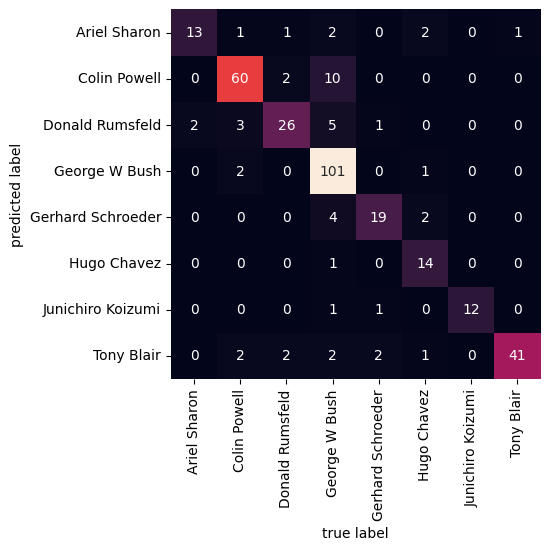

In [26]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

from sklearn.metrics import confusion_matrix:

Mengimpor fungsi confusion_matrix dari sklearn.metrics, yang digunakan untuk menghasilkan matriks kebingungan.
mat = confusion_matrix(ytest, yfit):

Menghasilkan matriks kebingungan yang membandingkan label yang diprediksi (yfit) dengan label asli (ytest).
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names):

mat.T: Matriks kebingungan ditransposisikan untuk menyelaraskan label yang benar (sumbu X) dan label yang diprediksi (sumbu Y).
square=True: Membuat heatmap dalam bentuk kotak (square).
annot=True: Menampilkan nilai numerik dalam setiap sel heatmap.
fmt='d': Format angka sebagai desimal.
cbar=False: Menonaktifkan color bar (skala warna) di samping heatmap.
xticklabels=faces.target_names dan yticklabels=faces.target_names: Menambahkan nama target pada sumbu X dan Y.
plt.xlabel('true label') dan plt.ylabel('predicted label'):

Menetapkan label sumbu X dan Y pada plot.

### **Praktikum 3**

In [42]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[115  33]
 [234 153]
 [141 160]
 [101 192]
 [ 85   4]
 [ 77  16]
 [155  43]
 [123 254]
 [170 114]
 [ 30  59]
 [  8  18]
 [ 54  91]
 [223 220]
 [ 28  85]
 [105 118]
 [ 75  79]
 [114  65]
 [ 93  88]
 [156  10]
 [ 17 224]
 [111  91]
 [ 95  94]
 [  1 241]
 [ 84 104]
 [139 104]
 [165  93]
 [ 68  89]
 [ 61  86]
 [ 33  85]
 [163  85]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Kode ini menghasilkan data dummy untuk klasifikasi dengan 30 sampel dan 2 fitur yang sudah diproses dalam bentuk diskrit (bilangan bulat), sementara labelnya berupa angka 0 atau 1.

In [43]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,115,33,0
1,234,153,0
2,141,160,0
3,101,192,0
4,85,4,0


Kode ini mengubah array fitur dan label dari make_classification menjadi dataframe dengan tiga kolom (Fitur 1, Fitur 2, dan Label), sehingga memudahkan untuk manipulasi dan analisis data dalam bentuk tabel.

In [44]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,115,33,Kelas B
1,234,153,Kelas B
2,141,160,Kelas B
3,101,192,Kelas B
4,85,4,Kelas B


kode diatas membuat salinan dataframe (df_label) dan mengganti nilai numerik pada kolom 'Label' dengan label yang lebih mudah dibaca ('Kelas A' dan 'Kelas B'). Mapping ini dilakukan menggunakan fungsi map dari Pandas, yang mengganti nilai 1 menjadi 'Kelas A' dan nilai 0 menjadi 'Kelas B'.

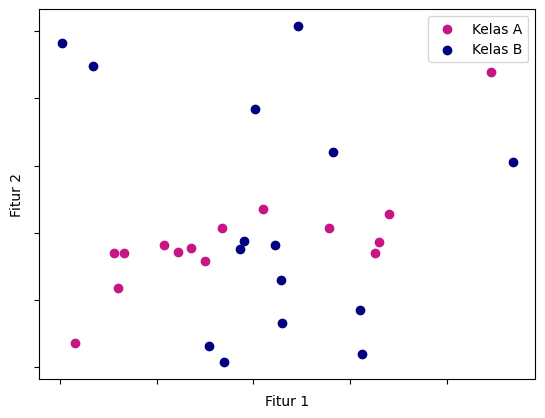

In [45]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Kode diatas membuat scatter plot dari data yang telah dikelompokkan berdasarkan label 'Kelas A' dan 'Kelas B'. Warna yang berbeda digunakan untuk setiap kelas (dengan 'Kelas A' berwarna MediumVioletRed dan 'Kelas B' berwarna Navy). Label sumbu dan legenda ditambahkan, dan angka pada skala sumbu dihilangkan agar plot lebih bersih.

In [46]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.42857142857142855
Hasil akurasi data test: 0.3333333333333333


model Multinomial Naive Bayes menggunakan data dummy (X dan y), memisahkannya menjadi data training (70%) dan testing (30%). Model dievaluasi dengan akurasi pada kedua set data, dan hasilnya dicetak untuk menunjukkan performa model.

In [47]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7619047619047619
Hasil akurasi data test (Gaussian): 0.5555555555555556


### **Praktikum 4**

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [52]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
X = df['SMS'].values
y = df['Labels'].values

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [55]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


### **Praktikum 5**

In [57]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

import library yang akan digunakan

In [58]:
# Image directories
train_dir = "/content/drive/MyDrive/ML/images/images/test/"
test_dir = "/content/drive/MyDrive/ML/images/images/test/"

train_dir dan test_dir:

Mendefinisikan path ke direktori gambar untuk training dan testing dataset.

In [59]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Fungsi ini mengorganisir gambar dengan label yang diambil dari nama subdirektori, dan mengembalikannya dalam bentuk list pasangan (gambar, label).

In [60]:
# Load training data
train_img = load_dataset(train_dir)

memuat semua gambar dari direktori pelatihan ke dalam variabel train_img.

In [61]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[ 68,  80,  80],
         [ 68,  80,  80],
         [ 68,  80,  80],
         ...,
         [ 44,  46,  41],
         [ 46,  48,  43],
         [ 48,  50,  45]],
 
        [[ 65,  77,  77],
         [ 66,  78,  78],
         [ 66,  78,  78],
         ...,
         [ 43,  45,  40],
         [ 48,  50,  45],
         [ 53,  55,  50]],
 
        [[ 67,  79,  79],
         [ 70,  82,  82],
         [ 72,  84,  84],
         ...,
         [ 46,  48,  43],
  

 kode ini menampilkan tuple pertama, yang berisi data gambar pertama (dalam bentuk array) dan label yang terkait dengan gambar tersebut

In [62]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 119
(614, 857, 3)


kode ini memilih satu gambar secara acak dari dataset, kemudian menampilkan ukurannya (dimensi array)

In [63]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Fungsi random_img_viz(img_list) dirancang untuk menampilkan gambar acak dari daftar gambar dan label yang diberikan, sekaligus mencetak informasi terkait gambar tersebut. Pertama, fungsi ini menghasilkan indeks acak menggunakan np.random.randint untuk memilih gambar dari daftar img_list. Kemudian, ia mengambil array gambar dan label dari tuple yang terpilih. Label ini dikategorikan menjadi string deskriptif, di mana label 1 dianggap sebagai "day" dan label lainnya sebagai "night". Setelah itu, fungsi menampilkan gambar menggunakan plt.imshow dan mencetak dimensi gambar serta labelnya.

Shape	: (614, 857, 3)
Label	: night


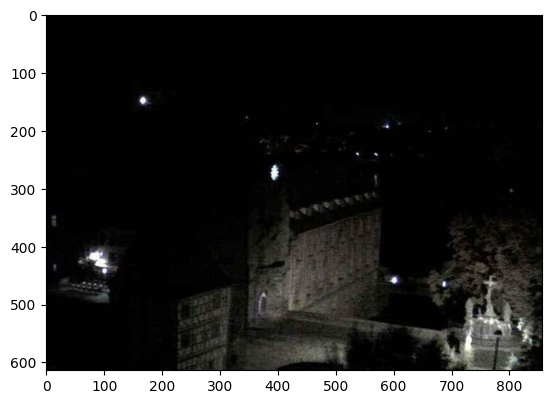

In [64]:
random_img_viz(train_img)

Baris kode random_img_viz(train_img) memanggil fungsi random_img_viz dengan argumen train_img, yang merupakan daftar gambar dan label yang telah dimuat sebelumnya.

In [65]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img


Fungsi standarized_input(image) bertujuan untuk melakukan pemrosesan gambar dengan mengubah ukurannya agar memiliki dimensi yang konsisten. Fungsi ini menerima parameter image, yang merupakan array numerik yang merepresentasikan gambar yang telah dimuat sebelumnya. Di dalam fungsi, ukuran gambar diubah menggunakan cv2.resize dari library OpenCV, di mana gambar diubah menjadi lebar 1100 piksel dan tinggi 600 piksel. Proses ini mungkin mengubah aspek rasio gambar, tetapi memastikan bahwa semua gambar memiliki ukuran yang sama. Setelah ukuran gambar diubah, fungsi mengembalikan gambar yang telah diproses, disimpan dalam variabel std_img

In [66]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Fungsi label_encoder(label) dirancang untuk mengubah label kategori berupa string menjadi nilai numerik yang dapat digunakan dalam analisis data atau pelatihan model machine learning. Fungsi ini menerima parameter label, yang diharapkan berisi string yang merepresentasikan kategori gambar, yaitu "day" atau "night". Di dalam fungsi, variabel num_val diinisialisasi dengan nilai 0. Jika label yang diberikan adalah "day", fungsi akan mengubah num_val menjadi 1. Setelah proses ini, fungsi mengembalikan nilai numerik yang sesuai, di mana "day" dikodekan sebagai 1 dan "night" tetap sebagai 0.

In [69]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Fungsi preprocess(img_list) bertujuan untuk memproses daftar gambar beserta labelnya agar siap digunakan dalam analisis atau pelatihan model machine learning. Fungsi ini bekerja dengan mengiterasi setiap item dalam img_list, yang merupakan tuple berisi gambar dan label. Untuk setiap item, gambar diubah ukurannya menggunakan fungsi standarized_input(image), sehingga semua gambar memiliki dimensi yang sama. Label stringnya dikonversi menjadi nilai numerik menggunakan label_encoder(label), di mana "day" menjadi 1 dan "night" menjadi 0. Setelah gambar dan label diproses, keduanya ditambahkan ke list std_img_list sebagai tuple (gambar terstandarisasi, label numerik).

In [70]:
train_std_img_list = preprocess(train_img)

train_std_img_list = preprocess(train_img) berfungsi untuk memproses daftar gambar dan label yang telah dimuat sebelumnya dalam variabel train_img. Dengan memanggil fungsi preprocess, setiap gambar dalam daftar akan diubah ukurannya menjadi dimensi yang konsisten menggunakan fungsi standarized_input, sementara labelnya akan dikodekan menjadi nilai numerik menggunakan fungsi label_encoder.

In [71]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 95
(600, 1100, 3)


pick_random = np.random.randint(0, len(train_std_img_list)) menghasilkan sebuah indeks acak untuk memilih salah satu gambar dari daftar train_std_img_list, yang merupakan hasil pemrosesan gambar dan label. Kemudian, baris print(f'Image {pick_random}') mencetak informasi mengenai indeks gambar yang dipilih. Selanjutnya, baris print(train_std_img_list[pick_random][0].shape) mengambil gambar dari daftar berdasarkan indeks acak tersebut dan mencetak ukuran (dimensi) gambar dalam format array.

Shape	: (600, 1100, 3)
Label	: 1


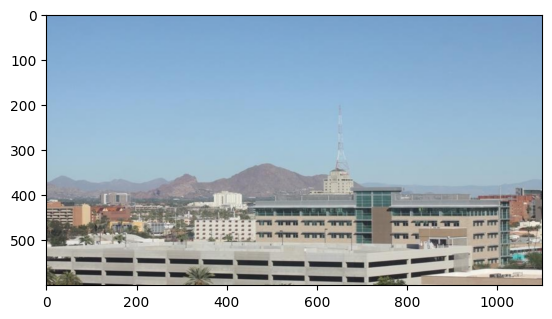

In [72]:
random_img_viz(train_std_img_list)

random_img_viz(train_std_img_list) memanggil fungsi random_img_viz dengan argumen train_std_img_list, yang berisi daftar gambar terstandarisasi beserta labelnya. Ketika fungsi ini dijalankan, ia akan memilih satu gambar secara acak dari daftar tersebut dan menampilkan gambar itu menggunakan matplotlib, sambil mencetak informasi mengenai ukuran gambar dan labelnya.

In [73]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

avg_brightness(image) dirancang untuk menghitung kecerahan rata-rata dari sebuah gambar dengan menggunakan ruang warna HSV (Hue, Saturation, Value). Pertama, gambar diubah dari format RGB menjadi HSV menggunakan cv2.cvtColor. Selanjutnya, fungsi ini menjumlahkan semua nilai pada saluran ketiga (Value) dari gambar HSV, yang merepresentasikan kecerahan. Dengan membagi total kecerahan tersebut dengan luas gambar (jumlah piksel)

Image 133
Avg Brighness: 74.0565


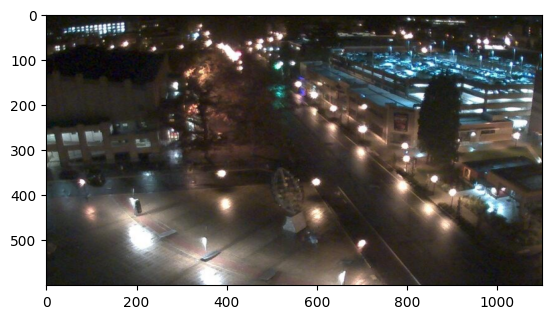

In [74]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Pertama, rand_img = np.random.randint(0, len(train_std_img_list)) menghasilkan indeks acak untuk memilih salah satu gambar dari daftar. Gambar yang dipilih disimpan dalam feature_img. Fungsi avg_brightness(feature_img) kemudian dipanggil untuk menghitung kecerahan rata-rata gambar tersebut, dan hasilnya disimpan dalam avg_img. Setelah itu, informasi mengenai indeks gambar yang dipilih dan nilai kecerahan rata-ratanya dicetak dengan format yang sudah ditentukan. Terakhir, gambar ditampilkan menggunakan plt.imshow(feature_img)

In [75]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

predict_label(img, threshold) bertujuan untuk memprediksi label kategori gambar berdasarkan kecerahan rata-rata yang dihitung. Pertama, fungsi ini memanggil avg_brightness(img) untuk mendapatkan nilai kecerahan rata-rata dari gambar yang diberikan. Kemudian, variabel pred diinisialisasi dengan nilai 0, yang merepresentasikan label "night".

Image 3
Actual label: 1
Predicted label: 1


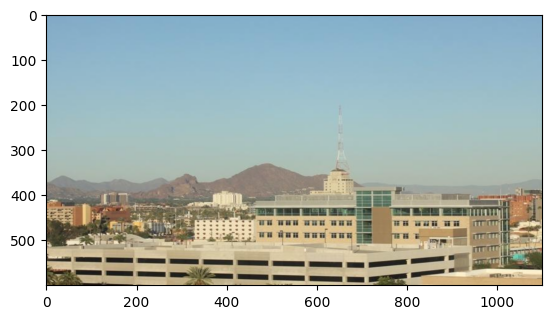

In [76]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

 Pertama, indeks acak dihasilkan dengan rand_img = np.random.randint(0, len(train_std_img_list)) untuk memilih salah satu gambar dari daftar train_std_img_list. Fungsi predict_label kemudian dipanggil dengan gambar yang dipilih dan ambang batas kecerahan yang ditentukan (120) untuk mendapatkan label prediksi, yang disimpan dalam variabel pred. Selanjutnya, informasi mengenai indeks gambar yang dipilih, label sebenarnya dari gambar tersebut, dan label yang diprediksi dicetak ke konsol. Terakhir, gambar ditampilkan menggunakan plt.imshow(train_std_img_list[rand_img][0])

In [77]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

fungsi ini menginisialisasi daftar kosong miss_labels untuk menyimpan gambar yang terklasifikasi salah. Kemudian, fungsi melakukan iterasi melalui setiap item dalam img_list, di mana gambar dan labelnya diambil. Untuk setiap gambar, fungsi predict_label dipanggil untuk mendapatkan label prediksi berdasarkan ambang batas yang ditentukan. Jika label prediksi tidak cocok dengan label sebenarnya, informasi mengenai gambar, label prediksi, dan label sebenarnya ditambahkan ke daftar miss_labels. Setelah menyelesaikan iterasi, fungsi menghitung total gambar, jumlah prediksi yang benar, dan akurasi dengan membandingkan jumlah prediksi yang benar dengan total gambar.

In [78]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8688


Fungsi ini menggunakan ambang batas kecerahan yang ditetapkan sebesar 120 untuk menentukan label prediksi gambar. Selama evaluasi, fungsi membandingkan label yang diprediksi dengan label sebenarnya untuk setiap gambar dalam daftar, mencatat gambar yang terklasifikasi salah. Setelah semua gambar dievaluasi, fungsi menghitung akurasi berdasarkan jumlah prediksi yang benar dibandingkan dengan total gambar.

In [79]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


test_img = load_dataset(test_dir) memanggil fungsi load_dataset untuk memuat gambar dari direktori pengujian yang ditentukan dalam test_dir. Setelah gambar dimuat, test_std_img_list = preprocess(test_img) memanggil fungsi preprocess untuk mengubah ukuran gambar dan mengkodekan label, sehingga semua gambar dalam daftar memiliki format yang seragam. Terakhir, evaluate(test_std_img_list, threshold=120)

In [80]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

extract_avg_bright_feature(img_list) dirancang untuk mengekstrak fitur kecerahan rata-rata dari setiap gambar dalam daftar img_list dan menyimpannya dalam format tabel menggunakan pandas. Di dalam fungsi ini, dua daftar kosong, avg_list dan labels, diinisialisasi untuk menyimpan nilai kecerahan rata-rata dan label gambar, masing-masing. Fungsi kemudian melakukan iterasi melalui setiap gambar dalam daftar, menggunakan avg_brightness(img[0]) untuk menghitung kecerahan rata-rata gambar dan menyimpannya dalam img_avg. Label gambar diambil dari elemen kedua tuple dan disimpan dalam img_label. Kedua nilai ini ditambahkan ke daftar masing-masing. Setelah iterasi selesai, fungsi menyusun data kecerahan rata-rata dan label menjadi format kolom menggunakan np.column_stack(), dan kemudian membuat sebuah DataFrame dari pandas dengan kolom AVG_BRIGHT untuk kecerahan rata-rata dan LABELS untuk label.

In [81]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,157.186358,1.0
1,144.243461,1.0
2,99.537641,1.0
3,183.717738,1.0
4,157.918309,1.0


train_avg_img = extract_avg_bright_feature(train_std_img_list) memanggil fungsi extract_avg_bright_feature untuk mengekstrak fitur kecerahan rata-rata dari gambar dalam train_std_img_list dan menyimpannya dalam DataFrame train_avg_img. Setelah fitur diekstrak, print(f'Shape: {train_avg_img.shape}') mencetak bentuk DataFrame, memberikan informasi tentang jumlah baris dan kolom. Terakhir, train_avg_img.head()

In [83]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

ertama, X_train dan y_train disiapkan dengan memisahkan fitur (kecerahan rata-rata) dan label dari DataFrame train_avg_img. X_train diambil dari kolom pertama dan diubah menjadi bentuk dua dimensi menggunakan .reshape(-1, 1), sedangkan y_train diambil dari kolom kedua. Hal yang sama dilakukan untuk data pengujian dengan X_test dan y_test yang diambil dari test_avg_img. Kemudian, objek model SVC() diinisialisasi, dan model dilatih menggunakan data pelatihan dengan model.fit(X_train, y_train)

In [84]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.925
Accuracy on test: 0.925


y_train_pred = model.predict(X_train) digunakan untuk memprediksi label dari data pelatihan X_train. Kemudian, acc_train = accuracy_score(y_train, y_train_pred) menghitung akurasi model pada data pelatihan dengan membandingkan label yang diprediksi dengan label sebenarnya. Proses serupa dilakukan untuk data pengujian dengan y_test_pred = model.predict(X_test) dan acc_test = accuracy_score(y_test, y_test_pred), yang menghitung akurasi pada data pengujian. Akhirnya, akurasi untuk kedua dataset dicetak menggunakan print()

### **Tugas 1**

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [86]:
data = pd.read_csv('/content/drive/MyDrive/ML/voice.csv')

X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9763406940063092
Classification Report:
               precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Pertama, dataset dimuat menggunakan pandas, dan fitur serta label dipisahkan, di mana X adalah semua kolom kecuali label, dan y adalah kolom label. Selanjutnya, data dibagi menjadi set pelatihan dan pengujian dengan proporsi 80-20 menggunakan train_test_split. Untuk menstandarisasi fitur, objek StandardScaler digunakan untuk merubah skala data, yang diterapkan pada data pelatihan dan pengujian. Model SVM dengan kernel linier kemudian dibuat dan dilatih menggunakan data pelatihan. Setelah model dilatih, prediksi dilakukan pada data pengujian, dan akurasi serta laporan klasifikasi (yang mencakup metrik seperti precision, recall, dan f1-score) dicetak untuk mengevaluasi kinerja model dalam mengklasifikasikan suara.

In [89]:
data = pd.read_csv('/content/drive/MyDrive/ML/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Multinomial Naive Bayes
vectorizer = CountVectorizer(stop_words='english')


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



pertama, pustaka yang diperlukan diimpor, termasuk pandas untuk pemrosesan data, CountVectorizer untuk mengubah teks menjadi representasi numerik, dan MultinomialNB serta metrik evaluasi untuk model. Setelah memuat dataset dan menghapus kolom yang tidak diperlukan, fitur dan label ditentukan, di mana X berisi teks pesan dan y berisi label spam atau bukan spam. Data kemudian dibagi menjadi set pelatihan dan pengujian dengan proporsi 80-20. Selanjutnya, CountVectorizer diinisialisasi dengan opsi untuk menghapus kata-kata umum dalam bahasa Inggris. Data pelatihan dan pengujian diubah menjadi format yang sesuai sebelum model Multinomial Naive Bayes dilatih menggunakan data pelatihan. Setelah model dilatih, prediksi dilakukan pada data pengujian, dan hasil evaluasi ditampilkan, mencakup akurasi serta laporan klasifikasi untuk menilai kinerja model dalam mengidentifikasi spam.

In [91]:
data = pd.read_csv('/content/drive/MyDrive/ML/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

X = data['text']
y = data['label']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi TF-IDF Vectorizer dengan stop_words diaktifkan
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Sesuaikan dan transformasi data pelatihan, dan transformasi data pengujian
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Buat dan latih model Multinomial Naive Bayes
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Lakukan prediksi pada data pengujian
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Evaluasi model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
classification_report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Akurasi menggunakan TF-IDF:", accuracy_tfidf)
print("Laporan Klasifikasi menggunakan TF-IDF:\n", classification_report_tfidf)

Akurasi menggunakan TF-IDF: 0.9668161434977578
Laporan Klasifikasi menggunakan TF-IDF:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Setelah menjalankan model Multinomial Naive Bayes dengan fitur TF-IDF dan mengukurnya dengan akurasi dan laporan klasifikasi, Anda dapat membandingkan hasilnya dengan hasil dari model sebelumnya yang menggunakan CountVectorizer.

Hasil Akurasi: Catat akurasi dari model TF-IDF dan akurasi dari model CountVectorizer. Ini akan memberikan gambaran tentang kinerja masing-masing model.

Laporan Klasifikasi: Bandingkan metrik lain seperti precision, recall, dan f1-score dari kedua model untuk menilai seberapa baik masing-masing model dalam mengklasifikasikan data spam.

TF-IDF cenderung memberikan hasil yang lebih baik daripada CountVectorizer dalam kasus-kasus di mana kata-kata yang lebih jarang memiliki nilai informasi yang lebih besar. Jika hasil akurasi TF-IDF lebih tinggi daripada CountVectorizer, maka dapat disimpulkan bahwa fitur TF-IDF lebih baik untuk kasus data spam ini. Namun, jika tidak ada perbedaan signifikan, maka bisa jadi kedua pendekatan tersebut memberikan hasil yang serupa dan keputusan penggunaan dapat didasarkan pada kemudahan dan interpretabilitas.

### **Tugas 2**

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

* numpy untuk operasi array dan komputasi numerik.
* matplotlib untuk memanipulasi dan menampilkan gambar.
* pathlib untuk memudahkan navigasi dan manipulasi jalur file.
* sklearn untuk membangun dan mengevaluasi model SVM serta menghitung metrik evaluasi.

In [112]:
train_dir = '/content/drive/MyDrive/ML/images/images/test/'
test_dir = '/content/drive/MyDrive/ML/images/images/test/'

Mendefinisikan jalur direktori untuk dataset pelatihan dan pengujian.

In [113]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    print(f"Muat {len(img_list)} gambar dari {img_dir}")  # Baris debug
    return img_list


Fungsi ini memuat semua gambar dari direktori yang ditentukan dan mengembalikannya dalam bentuk daftar berisi gambar dan labelnya.
Menggunakan Path.glob untuk menemukan semua sub-direktori dan file gambar (dalam format .jpg).

In [114]:
def extract_histogram_features(image, bins=256):
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)
    hist = np.histogram(image.flatten(), bins=bins, range=[0, 256])[0]
    return hist / np.sum(hist)  # Normalisasi histogram


Mengambil gambar dan menghitung histogram dari nilai pikselnya.
Jika gambar berwarna (3 saluran), gambar diubah menjadi grayscale dengan menghitung rata-rata nilai dari ketiga saluran.
Histogram dinormalisasi agar jumlah totalnya menjadi 1.

In [115]:
def prepare_data(data):
    X = np.array([extract_histogram_features(img) for img, _ in data])
    y = np.array([label for _, label in data])

    le = LabelEncoder()
    y = le.fit_transform(y)

    return X, y, le


Mengambil gambar dan label dari dataset, kemudian mengekstrak fitur histogram untuk setiap gambar.
Menggunakan LabelEncoder untuk mengubah label string menjadi angka sehingga dapat digunakan oleh model.

In [116]:
train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)


Muat 160 gambar dari /content/drive/MyDrive/ML/images/images/test/
Muat 160 gambar dari /content/drive/MyDrive/ML/images/images/test/


Memanggil fungsi load_dataset untuk memuat data pelatihan dan pengujian.

In [117]:
X_train, y_train, le = prepare_data(train_data)
X_test, y_test, _ = prepare_data(test_data)


Memanggil fungsi prepare_data untuk menyiapkan fitur (X) dan label (y) dari data pelatihan dan pengujian.

In [118]:
print("Bentuk X_train:", X_train.shape)
print("Bentuk y_train:", y_train.shape)


Bentuk X_train: (160, 256)
Bentuk y_train: (160,)


Mencetak bentuk dari data pelatihan untuk memastikan data tidak kosong sebelum melanjutkan.

In [119]:
if X_train.size > 0 and y_train.size > 0:
    svm_model = SVC(kernel='rbf', C=1.0, random_state=50)
    svm_model.fit(X_train, y_train)


Jika data pelatihan ada, model SVM dilatih menggunakan kernel Radial Basis Function (RBF).

In [120]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Skor Akurasi: {accuracy:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))


Skor Akurasi: 0.9625
Laporan Klasifikasi:
              precision    recall  f1-score   support

         day       0.96      0.96      0.96        80
       night       0.96      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160


Matriks Kebingungan:
[[77  3]
 [ 3 77]]


Menggunakan model terlatih untuk memprediksi label dari data pengujian
serta Menghitung akurasi dan mencetak laporan klasifikasi dan matriks kebingungan untuk menilai kinerja model.